# Confined Aquifer Test
**This example is taken from Kruseman and de Ridder (1970)**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ttim
import pandas as pd

Set basic parameters for the model:

In [2]:
H = 7  # aquifer thickness
zt = -18  # top boundary of aquifer
zb = zt - H  # bottom boundary of aquifer
Q = 788  # constant discharge

Create conceptual model:

In [3]:
# unkonwn parameters: kaq, Saq
ml = ttim.ModelMaq(kaq=60, z=[zt, zb], Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, Q)], layers=0)
ml.solve(silent="True")

Load data of two observation wells:

In [4]:
# time and drawdown of piezometer 30m away from pumping well
data1 = np.loadtxt("data/piezometer_h30.txt", skiprows=1)
t1 = data1[:, 0] / 60 / 24  # convert min to days
h1 = data1[:, 1]
r1 = 30
# time and drawdown of piezometer 90m away from pumping well
data2 = np.loadtxt("data/piezometer_h90.txt", skiprows=1)
t2 = data2[:, 0] / 60 / 24  # convert min to days
h2 = data2[:, 1]
r2 = 90

Calibrate using only the data from observation well 1:

In [5]:
ca1 = ttim.Calibrate(ml)
ca1.set_parameter(name="kaq0", initial=10)
ca1.set_parameter(name="Saq0", initial=1e-4)
ca1.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca1.fit(report=True)
display(ca1.parameters)

...................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03408048
    reduced chi-square = 0.00106502
    Akaike info crit   = -230.783293
    Bayesian info crit = -227.730572
[[Variables]]
    kaq0:  68.6394693 +/- 1.43827759 (2.10%) (init = 10)
    Saq0:  1.6071e-05 +/- 1.5823e-06 (9.85%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.891


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,68.6395,1.438278,2.09541,-inf,inf,10,[68.63946928731693]
Saq0,1.60712e-05,0.000002,9.8453,-inf,inf,0.0001,[1.607118069739686e-05]


rmse: 0.03166018156153158


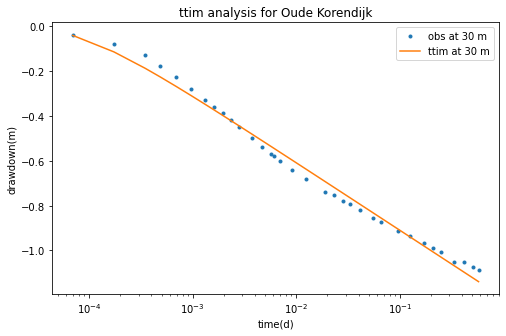

In [6]:
print("rmse:", ca1.rmse())
hm1 = ml.head(r1, 0, t1)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hm1[0], label="ttim at 30 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

Calibrate using only the data from observation well 2:

In [7]:
ca2 = ttim.Calibrate(ml)
ca2.set_parameter(name="kaq0", initial=10)
ca2.set_parameter(name="Saq0", initial=1e-4)
ca2.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca2.fit(report=True)
display(ca2.parameters)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 35
    # variables        = 2
    chi-square         = 0.01806492
    reduced chi-square = 5.4742e-04
    Akaike info crit   = -260.919609
    Bayesian info crit = -257.808913
[[Variables]]
    kaq0:  71.5830705 +/- 1.57403261 (2.20%) (init = 10)
    Saq0:  2.9106e-05 +/- 1.9378e-06 (6.66%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.847


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,71.5831,1.574033,2.19889,-inf,inf,10,[71.58307046727971]
Saq0,2.91065e-05,0.000002,6.65777,-inf,inf,0.0001,[2.9106495014403527e-05]


rmse: 0.022718724245662295


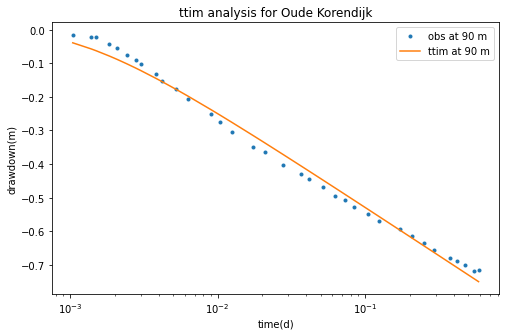

In [8]:
print("rmse:", ca2.rmse())
hm2 = ml.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t2, h2, ".", label="obs at 90 m")
plt.semilogx(t2, hm2[0], label="ttim at 90 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

Calibrate model with two datasets simultaneously:

In [9]:
ca = ttim.Calibrate(ml)
ca.set_parameter(name="kaq0", initial=10)
ca.set_parameter(name="Saq0", initial=1e-4)
ca.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca.fit(report=True)
display(ca.parameters)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 69
    # variables        = 2
    chi-square         = 0.17291362
    reduced chi-square = 0.00258080
    Akaike info crit   = -409.245804
    Bayesian info crit = -404.777591
[[Variables]]
    kaq0:  66.0884336 +/- 1.65496581 (2.50%) (init = 10)
    Saq0:  2.5410e-05 +/- 2.4017e-06 (9.45%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.855


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,66.0884,1.654966,2.50417,-inf,inf,10,[66.0884335879812]
Saq0,2.54102e-05,0.000002,9.45178,-inf,inf,0.0001,[2.5410188529330492e-05]


rmse: 0.05005990899693861


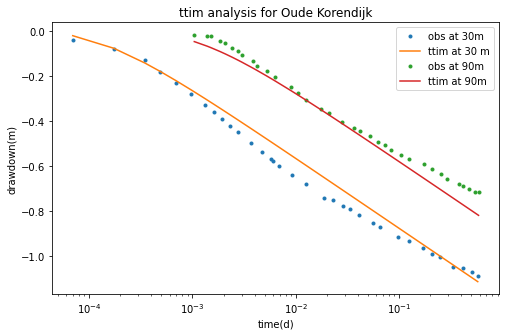

In [10]:
print("rmse:", ca.rmse())
hs1 = ml.head(r1, 0, t1)
hs2 = ml.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs at 30m")
plt.semilogx(t1, hs1[0], label="ttim at 30 m")
plt.semilogx(t2, h2, ".", label="obs at 90m")
plt.semilogx(t2, hs2[0], label="ttim at 90m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

Investigate whether adding well bore storage improves the fit:

Create conceptual model:

In [11]:
# unknown parameters: kaq, Saq and rc
ml1 = ttim.ModelMaq(kaq=60, z=[zt, zb], Saq=1e-4, tmin=1e-5, tmax=1)
w1 = ttim.Well(ml1, xw=0, yw=0, rw=0.2, rc=0.2, tsandQ=[(0, Q)], layers=0)
ml1.solve(silent="True")

Calibrate using only the data from observation well 1:

In [12]:
ca3 = ttim.Calibrate(ml1)
ca3.set_parameter(name="kaq0", initial=10)
ca3.set_parameter(name="Saq0", initial=1e-4)
ca3.set_parameter_by_reference(name="rc", parameter=w1.rc[0:], initial=0.2, pmin=0.01)
ca3.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca3.fit(report=True)
display(ca3.parameters)

..............................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 123
    # data points      = 34
    # variables        = 3
    chi-square         = 0.00793373
    reduced chi-square = 2.5593e-04
    Akaike info crit   = -278.341728
    Bayesian info crit = -273.762646
[[Variables]]
    kaq0:  80.8711512 +/- 1.71386696 (2.12%) (init = 10)
    Saq0:  5.4851e-06 +/- 7.9030e-07 (14.41%) (init = 0.0001)
    rc:    0.30300286 +/- 0.01743120 (5.75%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.975
    C(Saq0, rc)   = -0.870
    C(kaq0, rc)   =  0.829


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,80.8712,1.713867e+00,2.11926,-inf,inf,10,[80.87115115684033]
Saq0,5.48506e-06,7.903050e-07,14.4083,-inf,inf,0.0001,[5.485055599340013e-06]
rc,0.303003,1.743120e-02,5.75282,0.01,inf,0.2,[0.30300285668761484]


rmse: 0.015275638126121028


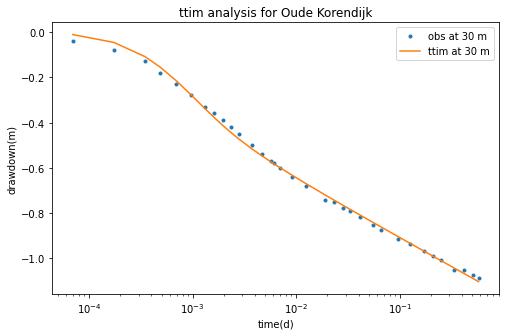

In [13]:
print("rmse:", ca3.rmse())
hm3 = ml1.head(r1, 0, t1)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs at 30 m")
plt.semilogx(t1, hm3[0], label="ttim at 30 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

Calibrate using only the data from observation well 2:

In [14]:
ca4 = ttim.Calibrate(ml1)
ca4.set_parameter(name="kaq0", initial=10)
ca4.set_parameter(name="Saq0", initial=1e-4)
ca4.set_parameter_by_reference(name="rc", parameter=w1.rc[0:], initial=0.2, pmin=0.01)
ca4.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca4.fit(report=True)
display(ca4.parameters)

...................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 35
    # variables        = 3
    chi-square         = 0.00135387
    reduced chi-square = 4.2308e-05
    Akaike info crit   = -349.604764
    Bayesian info crit = -344.938720
[[Variables]]
    kaq0:  88.4253341 +/- 1.46366354 (1.66%) (init = 10)
    Saq0:  1.1271e-05 +/- 9.2075e-07 (8.17%) (init = 0.0001)
    rc:    0.67776972 +/- 0.02992366 (4.42%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.981
    C(Saq0, rc)   = -0.940
    C(kaq0, rc)   =  0.912


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,88.4253,1.463664e+00,1.65525,-inf,inf,10,[88.42533414084704]
Saq0,1.12708e-05,9.207533e-07,8.16939,-inf,inf,0.0001,[1.1270766843523035e-05]
rc,0.67777,2.992366e-02,4.41502,0.01,inf,0.2,[0.6777697177678981]


rmse: 0.006219485714670683


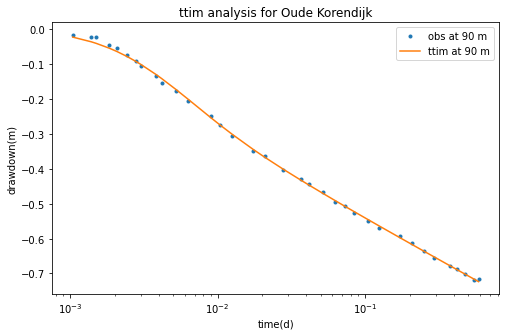

In [15]:
print("rmse:", ca4.rmse())
hm4 = ml1.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t2, h2, ".", label="obs at 90 m")
plt.semilogx(t2, hm4[0], label="ttim at 90 m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

Calibrate model with two datasets simultaneously:

In [16]:
ca0 = ttim.Calibrate(ml1)
ca0.set_parameter(name="kaq0", initial=10)
ca0.set_parameter(name="Saq0", initial=1e-4)
ca0.set_parameter_by_reference(name="rc", parameter=w1.rc[0:], initial=0.2, pmin=0.01)
ca0.series(name="obs1", x=r1, y=0, t=t1, h=h1, layer=0)
ca0.series(name="obs2", x=r2, y=0, t=t2, h=h2, layer=0)
ca0.fit(report=True)
display(ca0.parameters)

.....................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 69
    # variables        = 3
    chi-square         = 0.17294914
    reduced chi-square = 0.00262044
    Akaike info crit   = -407.231630
    Bayesian info crit = -400.529311
[[Variables]]
    kaq0:  66.0820095 +/- 1.71591047 (2.60%) (init = 10)
    Saq0:  2.5413e-05 +/- 2.4540e-06 (9.66%) (init = 0.0001)
    rc:    0.01002663 +/- 0.23362725 (2330.07%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.859
    C(kaq0, rc)   =  0.236
    C(Saq0, rc)   = -0.165


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,66.082,1.715910,2.59664,-inf,inf,10,[66.08200945032905]
Saq0,2.54132e-05,0.000002,9.65654,-inf,inf,0.0001,[2.541322353896833e-05]
rc,0.0100266,0.233627,2330.07,0.01,inf,0.2,[0.010026632267619018]


rmse: 0.05006505082044996


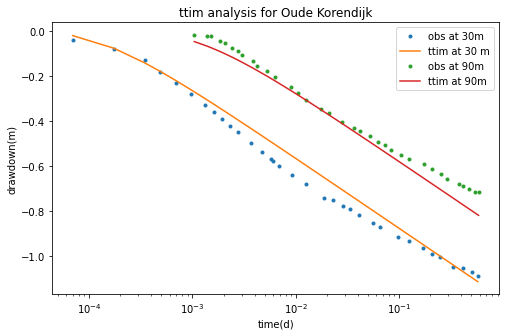

In [17]:
print("rmse:", ca0.rmse())
hs1 = ml1.head(r1, 0, t1)
hs2 = ml1.head(r2, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, ".", label="obs at 30m")
plt.semilogx(t1, hs1[0], label="ttim at 30 m")
plt.semilogx(t2, h2, ".", label="obs at 90m")
plt.semilogx(t2, hs2[0], label="ttim at 90m")
plt.xlabel("time(d)")
plt.ylabel("drawdown(m)")
plt.title("ttim analysis for Oude Korendijk")
plt.legend();

## Summary of values presented in Kruseman and de Ridder (1970)

Compare effect of rc:

In [18]:
t0 = pd.DataFrame(
    columns=["obs 30 m", "obs 90 m", "obs simultaneously"],
    index=["without rc", "with rc"],
)
t0.loc["without rc", "obs 30 m"] = ca1.rmse()
t0.loc["without rc", "obs 90 m"] = ca2.rmse()
t0.loc["without rc", "obs simultaneously"] = ca.rmse()
t0.loc["with rc", "obs 30 m"] = ca3.rmse()
t0.loc["with rc", "obs 90 m"] = ca4.rmse()
t0.loc["with rc", "obs simultaneously"] = ca0.rmse()
print("RMSE of two conceptual models:")
t0

RMSE of two conceptual models:


,obs 30 m,obs 90 m,obs simultaneously
without rc,0.0316602,0.0227187,0.0500599
with rc,0.0152756,0.00621949,0.0500651


Adding wellbore storage improve the performance when use drawdown data of two observation wells respectively. However, when calibrate model with two datasets simultaneously, rc approaches minimum value. Adding rc does not improve the performance much.

Compare ttim to results of K&dR, AQTEOLV and MLU:

In [19]:
t = pd.DataFrame(
    columns=["k [m/d]", "Ss [1/m]", "RMSE"], index=["K&dR", "ttim", "AQTESOLV", "MLU"]
)
t.loc["ttim"] = np.append(ca.parameters["optimal"].values, ca.rmse())
t.loc["AQTESOLV"] = [66.086, 2.541e-05, 0.05006]
t.loc["MLU"] = [66.850, 2.400e-05, 0.05083]
t.loc["K&dR"] = [55.71429, 1.7e-4, "-"]
t

,k [m/d],Ss [1/m],RMSE
K&dR,55.7143,0.00017,-
ttim,66.0884,2.54102e-05,0.0500599
AQTESOLV,66.086,2.541e-05,0.05006
MLU,66.85,2.4e-05,0.05083
